# *Decision Tree*

 1. What is a Decision Tree, and how does it work?
 -> A flowchart-like structure that recursively splits data based on features to make predictions. It works by learning simple decision rules inferred from the data features.
 2. What are impurity measures in Decision Trees ?
 -> Functions (like Gini and Entropy) used to assess the homogeneity of class labels within a node. The goal is to reduce impurity with each split.
 3. What is the mathematical formula for Gini Impurity?
 -> G(t)=1−∑i=1Jpi^2
 4. What is the mathematical formula for Entropy?
 -> H(t)=−∑i=1Jpilog2(pi)
 5. What is Information Gain, and how is it used in Decision Trees ?
 -> The reduction in impurity after a split. It's used to determine the best feature to split on at each node by selecting the one with the highest gain.
 6. What is the difference between Gini Impurity and Entropy?
 -> Both measure impurity, but Entropy uses logarithms and is slightly more sensitive to class probabilities, while Gini is computationally simpler and tends to favor equally sized splits.
 7. What is the mathematical explanation behind Decision Trees?
 -> They approximate complex decision boundaries with a series of axis-parallel hyperplanes, partitioning the feature space into regions with specific predictions.
 8. What is Pre-Pruning in Decision Trees ?
 -> Stopping the tree growth early based on predefined criteria (e.g., max depth, min samples per leaf) to avoid overfitting.
 9. What is Post-Pruning in Decision Trees?
 -> Growing a full tree and then removing sub-trees that do not improve performance on a validation set.
 10. What is the difference between Pre-Pruning and Post-Pruning ?
 -> Pre-pruning stops early, while post-pruning grows fully and then prunes back. Post-pruning is generally more effective but computationally more expensive.
 11. What is a Decision Tree Regressor?
 -> A Decision Tree used for predicting continuous numerical values instead of class labels. The leaf nodes contain the predicted numerical value (e.g., the average of the training values in that leaf).
 12. What are the advantages and disadvantages of Decision Trees?
 -> Advantages: Easy to understand and interpret, handles both categorical and numerical data, requires little data preprocessing, can capture non-linear relationships.
Disadvantages: Prone to overfitting, can be unstable (small data changes can lead to different trees), can be biased towards features with more levels.
 13. How does a Decision Tree handle missing values?
 -> Common strategies include ignoring instances with missing values during the split finding process, imputing missing values, or creating a separate branch for missing values.
 14. How does a Decision Tree handle categorical features?
 -> By creating splits based on the different categories. Multi-way splits (one branch per category) or binary splits (grouping categories) are possible.
 15. What are some real-world applications of Decision Trees?
 -> Medical diagnosis, credit risk assessment, fraud detection, customer churn prediction, image classification, and recommendation systems.

1.  Write a Python program to train a Decision Tree Classifier on the Iris dataset and print the model accuracy.

In [1]:
from sklearn.datasets import load_iris
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score

iris = load_iris()
X = iris.data
y = iris.target

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

clf = DecisionTreeClassifier(random_state=42)
clf.fit(X_train, y_train)

y_pred = clf.predict(X_test)

accuracy = accuracy_score(y_test, y_pred)
print(f"Model Accuracy: {accuracy}")

Model Accuracy: 1.0


2. Write a Python program to train a Decision Tree Classifier using Gini Impurity as the criterion and print the
feature importances.

In [2]:
clf_gini = DecisionTreeClassifier(criterion='gini', random_state=42)
clf_gini.fit(X_train, y_train)

print("Feature Importances:")
for name, importance in zip(iris.feature_names, clf_gini.feature_importances_):
  print(f"{name}: {importance:.4f}")

Feature Importances:
sepal length (cm): 0.0000
sepal width (cm): 0.0191
petal length (cm): 0.8933
petal width (cm): 0.0876


3. Write a Python program to train a Decision Tree Classifier using Entropy as the splitting criterion and print the
model accuracy

In [3]:

clf_entropy = DecisionTreeClassifier(criterion='entropy', random_state=42)
clf_entropy.fit(X_train, y_train)

y_pred_entropy = clf_entropy.predict(X_test)

accuracy_entropy = accuracy_score(y_test, y_pred_entropy)
print(f"Model Accuracy (Entropy): {accuracy_entropy}")

Model Accuracy (Entropy): 0.9777777777777777


4. Write a Python program to train a Decision Tree Regressor on a housing dataset and evaluate using Mean
Squared Error (MSE)

In [4]:
from sklearn.datasets import fetch_california_housing
from sklearn.tree import DecisionTreeRegressor
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error


housing = fetch_california_housing()
X_reg = housing.data
y_reg = housing.target

X_train_reg, X_test_reg, y_train_reg, y_test_reg = train_test_split(X_reg, y_reg, test_size=0.3, random_state=42)

regressor = DecisionTreeRegressor(random_state=42)
regressor.fit(X_train_reg, y_train_reg)

y_pred_reg = regressor.predict(X_test_reg)

mse = mean_squared_error(y_test_reg, y_pred_reg)
print(f"Mean Squared Error (MSE): {mse:.4f}")


Mean Squared Error (MSE): 0.5280


5. Write a Python program to train a Decision Tree Classifier and visualize the tree using graphviz

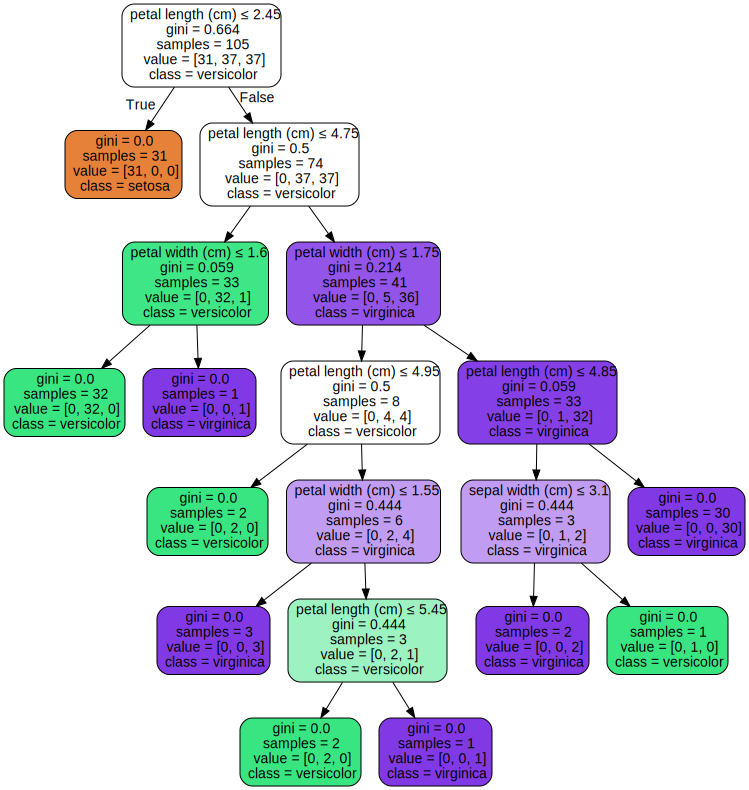

In [5]:
!pip install graphviz
from sklearn.tree import export_graphviz
import graphviz
dot_data = export_graphviz(clf, out_file=None,
                           feature_names=iris.feature_names,
                           class_names=iris.target_names,
                           filled=True, rounded=True,
                           special_characters=True)
graph = graphviz.Source(dot_data)
graph

6. Write a Python program to train a Decision Tree Classifier with a maximum depth of 3 and compare its
accuracy with a fully grown tree

In [6]:
clf_limited_depth = DecisionTreeClassifier(max_depth=3, random_state=42)
clf_limited_depth.fit(X_train, y_train)
y_pred_limited_depth = clf_limited_depth.predict(X_test)
accuracy_limited_depth = accuracy_score(y_test, y_pred_limited_depth)
print(f"Accuracy with max_depth=3: {accuracy_limited_depth}")

clf_full_depth = DecisionTreeClassifier(random_state=42)
clf_full_depth.fit(X_train, y_train)
y_pred_full_depth = clf_full_depth.predict(X_test)
accuracy_full_depth = accuracy_score(y_test, y_pred_full_depth)
print(f"Accuracy of fully grown tree: {accuracy_full_depth}")

Accuracy with max_depth=3: 1.0
Accuracy of fully grown tree: 1.0


7. Write a Python program to train a Decision Tree Classifier using min_samples_split=5 and compare its
accuracy with a default tree

In [7]:
clf_min_samples = DecisionTreeClassifier(min_samples_split=5, random_state=42)
clf_min_samples.fit(X_train, y_train)
y_pred_min_samples = clf_min_samples.predict(X_test)
accuracy_min_samples = accuracy_score(y_test, y_pred_min_samples)
print(f"Accuracy with min_samples_split=5: {accuracy_min_samples}")

print(f"Accuracy of default tree: {accuracy_full_depth}")

Accuracy with min_samples_split=5: 1.0
Accuracy of default tree: 1.0


8.  Write a Python program to apply feature scaling before training a Decision Tree Classifier and compare its
accuracy with unscaled data.

In [8]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

clf_scaled = DecisionTreeClassifier(random_state=42)
clf_scaled.fit(X_train_scaled, y_train)
y_pred_scaled = clf_scaled.predict(X_test_scaled)
accuracy_scaled = accuracy_score(y_test, y_pred_scaled)
print(f"Accuracy with scaled data: {accuracy_scaled}")

print(f"Accuracy with unscaled data: {accuracy_full_depth}")


Accuracy with scaled data: 1.0
Accuracy with unscaled data: 1.0


9. Write a Python program to train a Decision Tree Classifier using One-vs-Rest (OvR) strategy for multiclass
classification.

In [9]:
from sklearn.multiclass import OneVsRestClassifier

ovr_clf = OneVsRestClassifier(DecisionTreeClassifier(random_state=42))
ovr_clf.fit(X_train, y_train)

y_pred_ovr = ovr_clf.predict(X_test)

accuracy_ovr = accuracy_score(y_test, y_pred_ovr)
print(f"Model Accuracy (One-vs-Rest Decision Tree): {accuracy_ovr}")

Model Accuracy (One-vs-Rest Decision Tree): 1.0


10.  Write a Python program to train a Decision Tree Classifier and display the feature importance scores.

In [10]:
print("\nFeature importance scores:")
for name, importance in zip(iris.feature_names, clf.feature_importances_):
  print(f"{name}: {importance:.4f}")


Feature importance scores:
sepal length (cm): 0.0000
sepal width (cm): 0.0191
petal length (cm): 0.8933
petal width (cm): 0.0876


11.  Write a Python program to train a Decision Tree Regressor with max_depth=5 and compare its performance
with an unrestricted tree.

In [12]:

regressor_limited_depth = DecisionTreeRegressor(max_depth=5, random_state=42)
regressor_limited_depth.fit(X_train_reg, y_train_reg)
y_pred_reg_limited_depth = regressor_limited_depth.predict(X_test_reg)
mse_limited_depth = mean_squared_error(y_test_reg, y_pred_reg_limited_depth)
print(f"\nMean Squared Error (MSE) with max_depth=5: {mse_limited_depth:.4f}")


print(f"Mean Squared Error (MSE) of unrestricted tree: {mse:.4f}")


Mean Squared Error (MSE) with max_depth=5: 0.5211
Mean Squared Error (MSE) of unrestricted tree: 0.5280


12. Write a Python program to train a Decision Tree Classifier, apply Cost Complexity Pruning (CCP), and
visualize its effect on accuracy

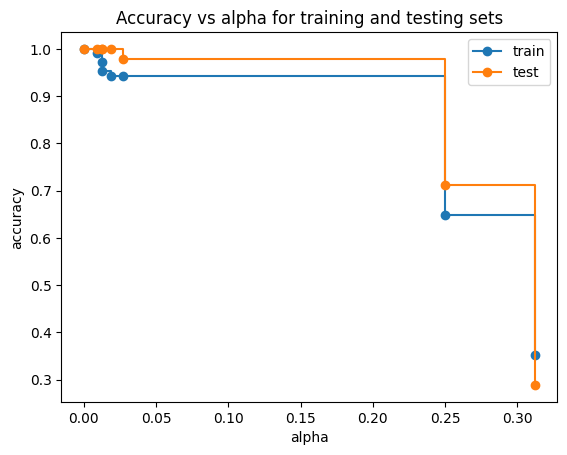

In [13]:
import matplotlib.pyplot as plt

path = clf.cost_complexity_pruning_path(X_train, y_train)
ccp_alphas, impurities = path.ccp_alphas, path.impurities

clfs = []
for ccp_alpha in ccp_alphas:
    clf = DecisionTreeClassifier(random_state=0, ccp_alpha=ccp_alpha)
    clf.fit(X_train, y_train)
    clfs.append(clf)

train_scores = [clf.score(X_train, y_train) for clf in clfs]
test_scores = [clf.score(X_test, y_test) for clf in clfs]

fig, ax = plt.subplots()
ax.set_xlabel("alpha")
ax.set_ylabel("accuracy")
ax.set_title("Accuracy vs alpha for training and testing sets")
ax.plot(ccp_alphas, train_scores, marker='o', label="train",
        drawstyle="steps-post")
ax.plot(ccp_alphas, test_scores, marker='o', label="test",
        drawstyle="steps-post")
ax.legend()
plt.show()

13.  Write a Python program to train a Decision Tree Classifier and evaluate its performance using Precision,
Recall, and F1-Score

In [14]:
from sklearn.metrics import precision_score, recall_score, f1_score

precision = precision_score(y_test, y_pred, average='weighted')
recall = recall_score(y_test, y_pred, average='weighted')
f1 = f1_score(y_test, y_pred, average='weighted')

print(f"\nPrecision: {precision:.4f}")
print(f"Recall: {recall:.4f}")
print(f"F1-Score: {f1:.4f}")



Precision: 1.0000
Recall: 1.0000
F1-Score: 1.0000


14.  Write a Python program to train a Decision Tree Classifier and visualize the confusion matrix using seaborn

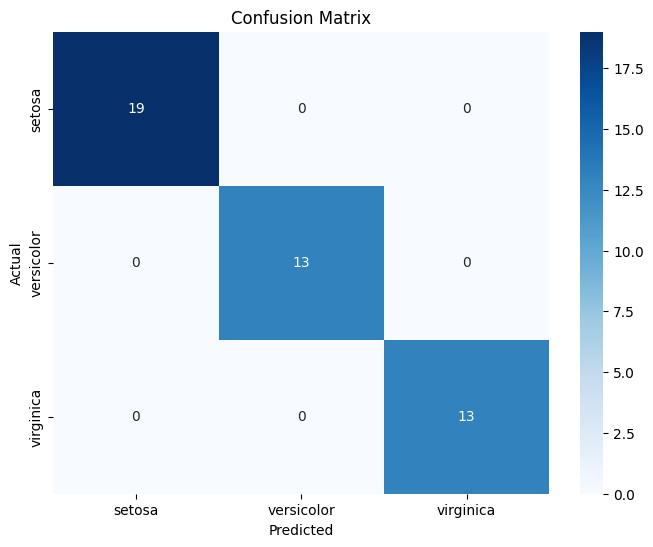

In [15]:
import seaborn as sns
from sklearn.metrics import confusion_matrix

cm = confusion_matrix(y_test, y_pred)

plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=iris.target_names, yticklabels=iris.target_names)
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix')
plt.show()

15.  Write a Python program to train a Decision Tree Classifier and use GridSearchCV to find the optimal values
for max_depth and min_samples_split

In [16]:
from sklearn.model_selection import GridSearchCV

param_grid = {
    'max_depth': [None, 3, 5, 7, 10],
    'min_samples_split': [2, 5, 10, 20]
}

grid_search = GridSearchCV(DecisionTreeClassifier(random_state=42), param_grid, cv=5, scoring='accuracy')

grid_search.fit(X_train, y_train)

print("\nBest parameters found by GridSearchCV:")
print(grid_search.best_params_)

print("\nBest cross-validation accuracy:")
print(grid_search.best_score_)

best_clf = grid_search.best_estimator_
y_pred_best = best_clf.predict(X_test)
accuracy_best = accuracy_score(y_test, y_pred_best)
print(f"\nAccuracy on the test set with best parameters: {accuracy_best}")


Best parameters found by GridSearchCV:
{'max_depth': None, 'min_samples_split': 10}

Best cross-validation accuracy:
0.9428571428571428

Accuracy on the test set with best parameters: 1.0
